# Shap: Model Interpretation
[SHAP](https://github.com/slundberg/shap) (SHapley Additive exPlanations) is a game theoretic approach to explain Machine Learning models. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions. All charts in SHAP use Shapley values and feature values since they represent a feature's responsibility for a change in the model output. The SHAP values provide two great advantages come along with 3 main types of charts (bar, waterfall and scatter plot):
- Global interpretability - the SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. This is like the variable importance plot but it is able to show the positive or negative relationship for each variable with the target
- Local interpretability - each observation gets its own set of SHAP values. Traditional variable importance algorithms only show the results across the entire population but not on each individual case. The local interpretability enables us to pinpoint and contrast the impacts of the factors

SHAP has a total of 5 explainers out of which 2 are frequently used: *tree explainer* and *kernel explainer*. Others is using for text, image and deep learning. The difference between these explainers is the algorithm used to compute the SHAP values. But there is 1 module called *Explainer* - it can be used with any model but taking long time to print the result. To optimize the speed, use the right explainer with the model. There are two documentation sites can be found, the [official one](https://shap.readthedocs.io/en/latest/index.html) with mainly of notebook examples and an [non-official one](https://shap-lrjball.readthedocs.io/en/latest/index.html) with API references.

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shap
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")
shap.initjs()
%config InlineBackend.figure_format = 'retina'

## 1. Tabular explainers

In [211]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shap
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")
shap.initjs()
%config InlineBackend.figure_format = 'retina'

In [115]:
dfBoston = pd.read_csv('../data/boston.csv')
xBoston = dfBoston.drop(columns='price')
yBoston = dfBoston['price']

reg = XGBRegressor()
reg = reg.fit(xBoston, yBoston)

In [212]:
dfCancer = pd.read_csv('../data/breast_cancer.csv')
xCancer = dfCancer.drop(columns='target')
yCancer = dfCancer['target']

clf = LogisticRegression()
clf = clf.fit(xCancer, yCancer)

### 1.1. Explainers

#### Kernel explainer
In SHAP, the class [`KernelExplainer`] is a general explainer designed to explain any Python function. So when using it for Machine Learning, we pass to it either the function `regressor.predict()` or `classifier.predict_proba()`. Then call the `shap_values()` method on the intialized explainer to get the matrix of SHAP values. This matrix has exactly the same shape with the input data, allowing us to visualize model results in different ways.

However, the downside of `KernelExplainer` is that it makes almost no assumption about data, making the computation time very long. In the example below, we use it to explain a regressor and a classifier, for a single observation only. In the case of (binary) classification, notice that SHAP will return a list of matrices, each corresponds to a class.

[`KernelExplainer`]: https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html

In [205]:
idxSample = 7

explainer = shap.KernelExplainer(reg.predict, xBoston.sample(50))
shapValue = explainer.shap_values(xBoston.iloc[idxSample, :])

shap.force_plot(
    explainer.expected_value,
    shapValue, 
    xBoston.columns
)

In [213]:
idxSample = 7
idxClass = 1

explainer = shap.KernelExplainer(clf.predict_proba, xCancer.sample(100))
shapValue = explainer.shap_values(xCancer.iloc[idxSample, :])

shap.force_plot(
    explainer.expected_value[idxClass],
    shapValue[idxClass], 
    xCancer.columns,
)

#### Linear explainer
The class [`LinearExplainer`] is an exact method, dedicated for linear models such as Linear Regression and Logistic Regression. Being a dedicated method, it is much faster than general methods so we can compute SHAP values for all observations in seconds.

[`LinearExplainer`]: https://shap-lrjball.readthedocs.io/en/latest/generated/shap.LinearExplainer.html

In [291]:
idxSample = 7

explainer = shap.LinearExplainer(clf, xCancer)
shapValue = explainer(xCancer)

shap.force_plot(
    shapValue.base_values,
    shapValue.values[idxSample], 
    xCancer.columns,
    link='logit'
)

#### Tree explainer
[`TreeExplainer`](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.TreeExplainer.html) is another exact method, dedicated for tree-based models such as XGBoost and LightGBM. This explainer has a novel feature that computes interaction SHAP values between feature pairs, which can be used to draw dependece plots.

In [292]:
idxSample = 7

explainer = shap.TreeExplainer(reg)
shapValue = explainer.shap_values(xBoston)
shapInteract = explainer.shap_interaction_values(xBoston)
shapInteract.shape

(506, 13, 13)

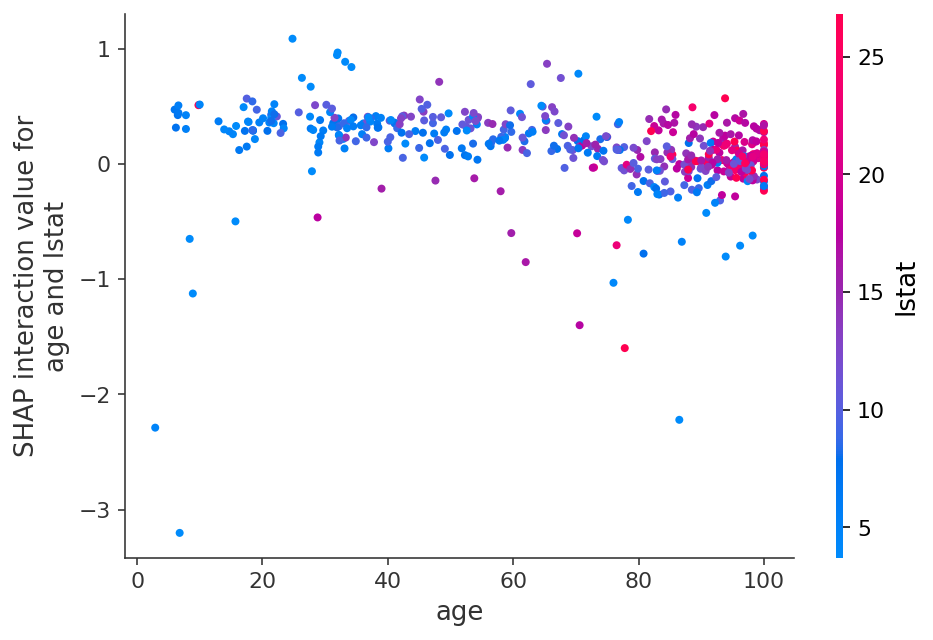

In [266]:
shap.dependence_plot(
    ('age', 'lstat'),
    shapInteract,
    xBoston
)

#### Smart explainer
SHAP also provides a convenience class, [`Explainer`], which is highly recommended. It is able to determine model type itself and select the best explaining algorithm, all automatically.

[`Explainer`]: https://shap-lrjball.readthedocs.io/en/latest/generated/shap.Explainer.html

In [206]:
idxSample = 7

explainer = shap.Explainer(reg)
shapValue = explainer(xBoston)

shap.force_plot(
    explainer.expected_value,
    shapValue.values[idxSample],
    features=xBoston.columns
)

### 1.2. Plots

In [1]:
import warnings
import numpy as np
import pandas as pd

import shap
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")
shap.initjs()
%config InlineBackend.figure_format = 'retina'

In [2]:
dfBoston = pd.read_csv('../data/boston.csv')
xBoston = dfBoston.drop(columns='price')
yBoston = dfBoston['price']
xBoston.shape

(506, 13)

In [3]:
reg = XGBRegressor()
reg = reg.fit(xBoston, yBoston)

In [4]:
explainer = shap.TreeExplainer(reg)
shapValue = explainer(xBoston)
shapInteract = explainer.shap_interaction_values(xBoston)
shapInteract.shape

(506, 13, 13)

In [6]:
shapInteract = explainer(xBoston, interactions=True)

#### Bar plot
Bar plot is very familiar in model interpretation as it has been widely used to visualize feature importances. In SHAP, the function [`shap.plots.bar()`] extends the expressivity in many ways:
- *Global* plot aggregates the mean of absolute SHAP values, showing general feature importances.
- *Local* plot displays the real SHAP values of a single observation. For this case only, `shap.plots.waterfall()` can be used as an alternative.
- *Cohort* plot displays global importances for a number of categories.

[`shap.plots.bar()`]: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html

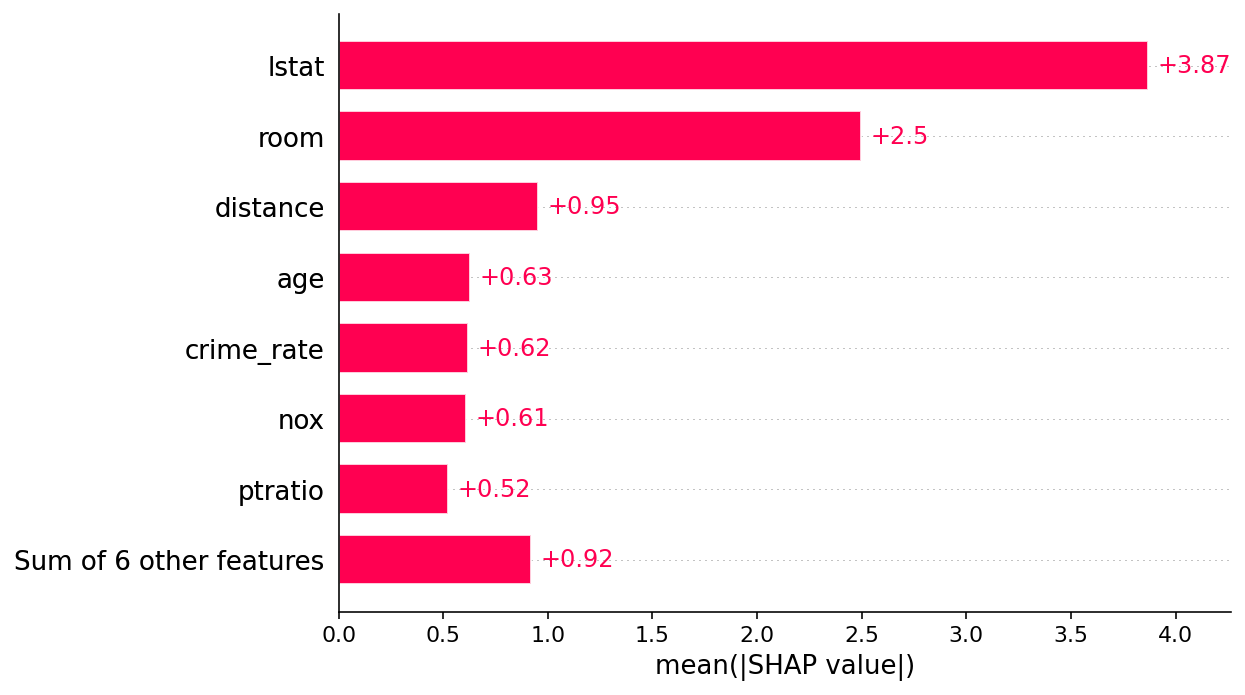

In [5]:
shap.plots.bar(shapValue, max_display=8)

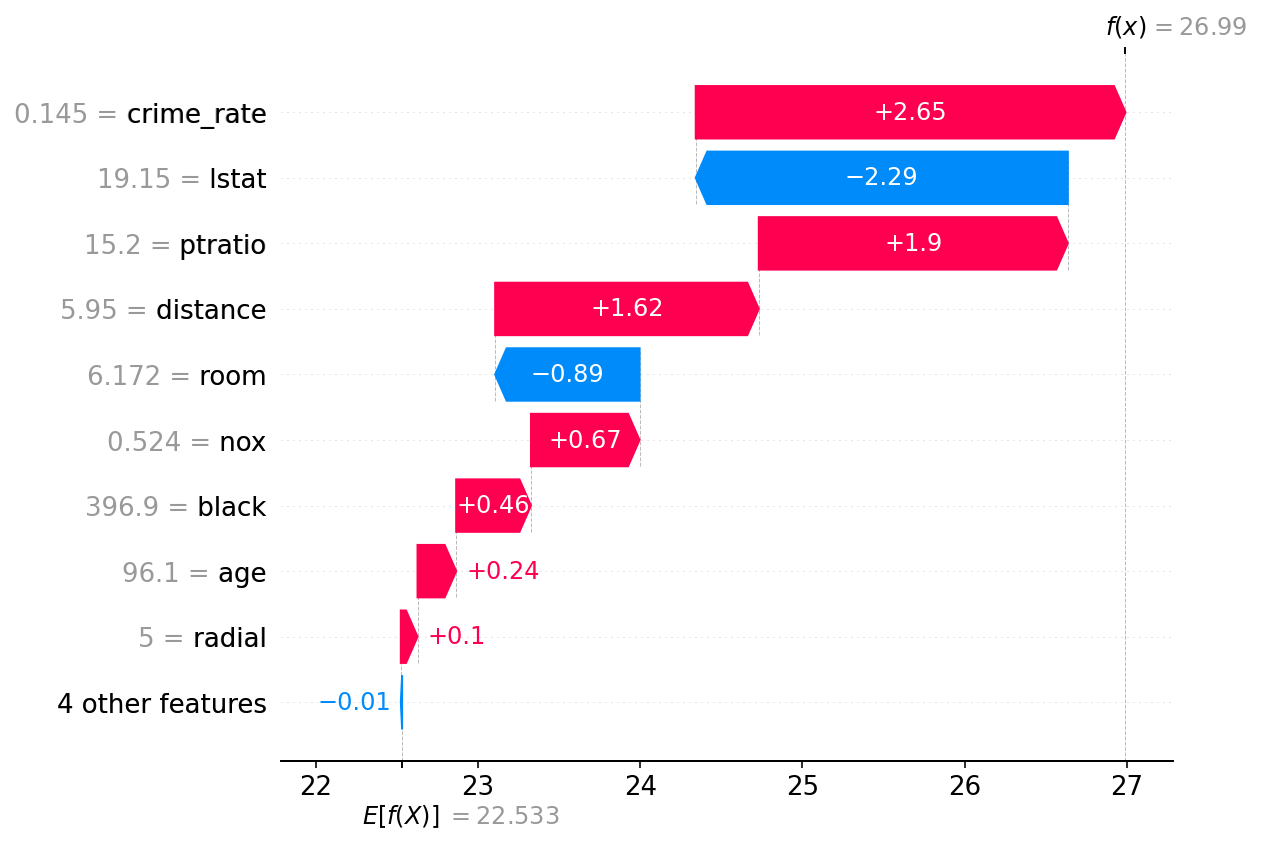

In [17]:
shap.plots.waterfall(shapValue[7])

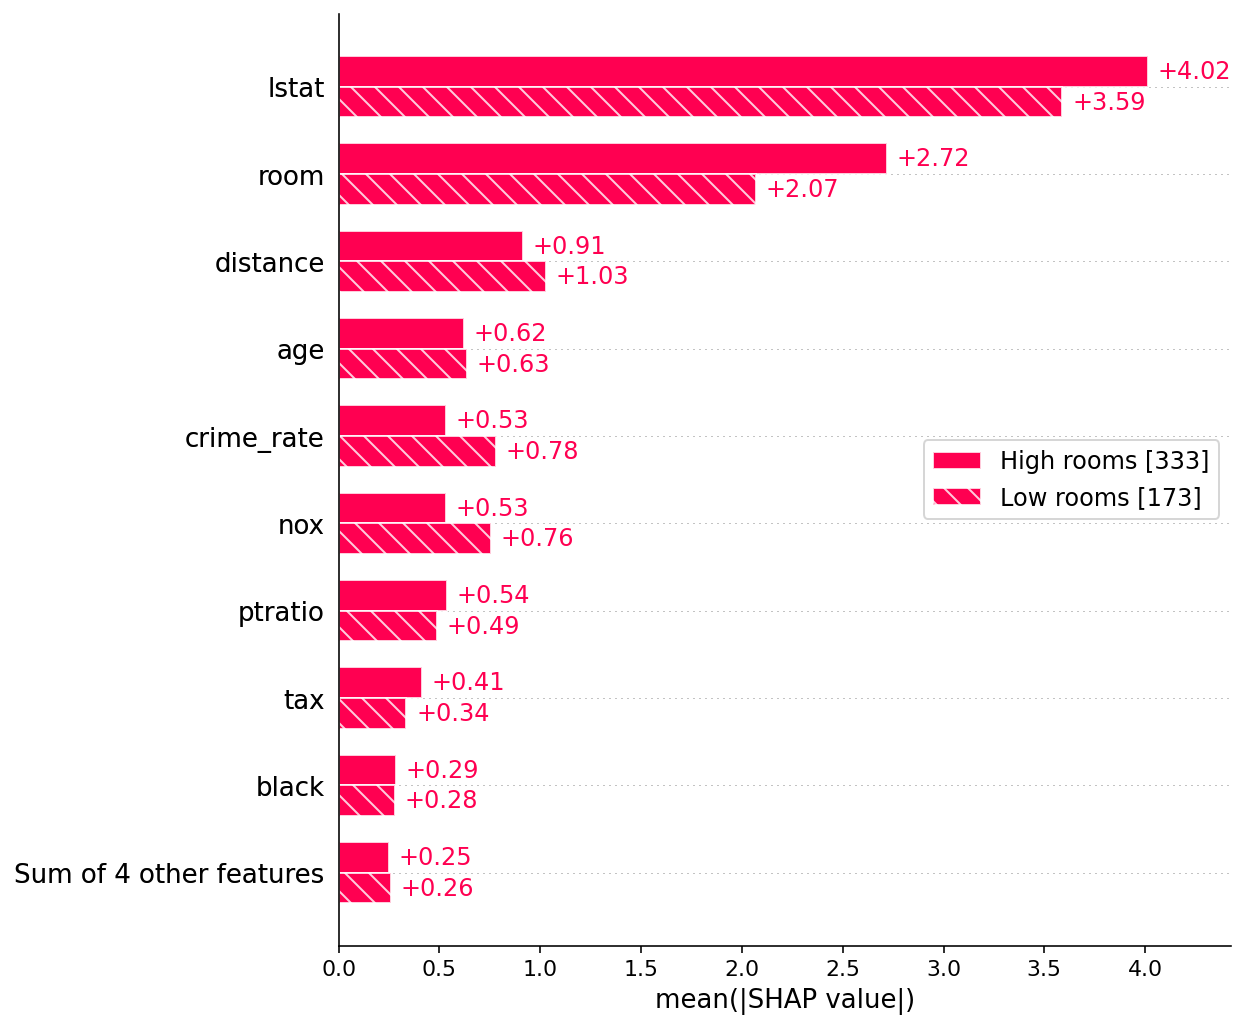

In [14]:
@np.vectorize
def map_room(x):
    if x < 6:
        return 'Low rooms'
    else:
        return 'High rooms'

cohort = map_room(shapValue[:, 'room'].data)
shap.plots.bar(shapValue.cohorts(cohort).abs.mean(0))

#### Beeswarm plot
Beeswarm plot, implemented via the function [`shap.plots.beeswarm()`], visualizes all observations rather than aggregating them like bar plot does. Each dot represents a single cell in the data table, with its color displaying feature value. This tells us in which direction a feature contributes to the model prediction. For example, we can observe that `lstat` contributes decreasingly and `room` contributes *increasingly* to our Boston regression output.

[`shap.plots.beeswarm()`]: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html

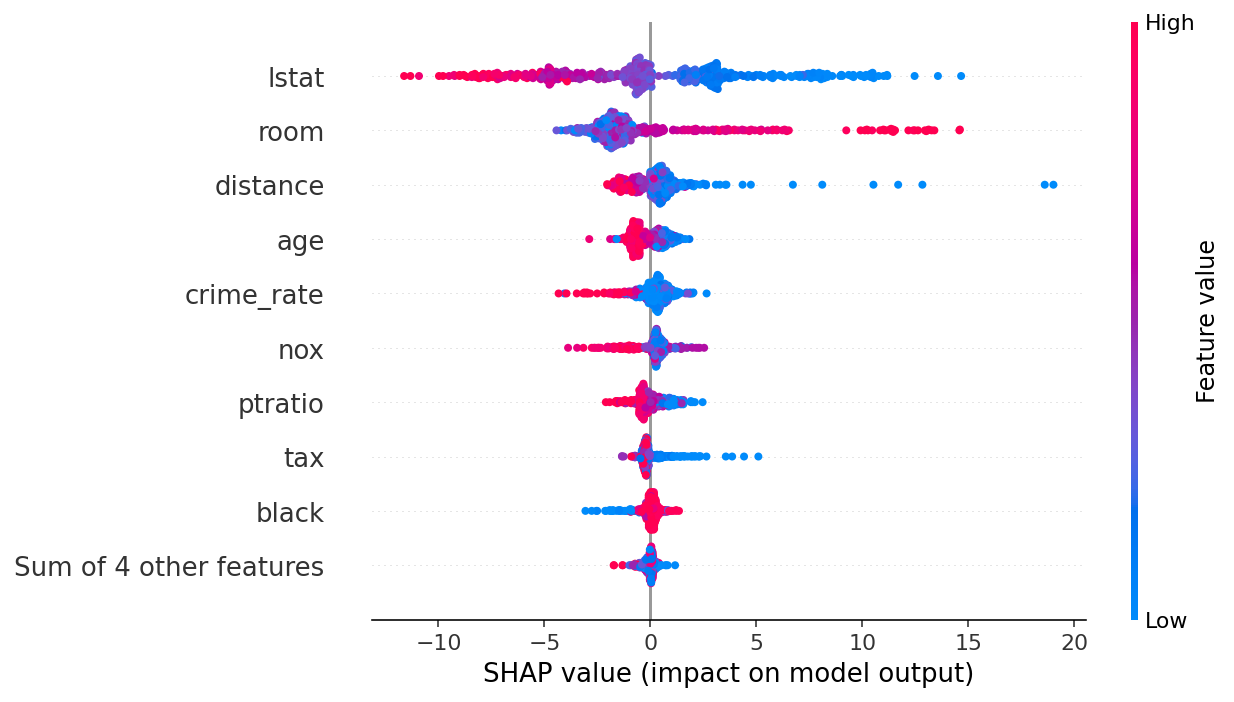

In [19]:
shap.plots.beeswarm(shapValue)

There is another advanced scenario that we can utilize beeswarm plot, which is preprocessing SHAP values before plotting. With some visualization techniques: fixing to a single color and setting opacity to 20%, the chart can now show the distribution of SHAP values. This very useful to double-check the earlier global bar plot if you have any suspection on it. In this case, there is no doubt that
- `lstat` is the most important feature as its SHAP values are uniformally high.
- `room` is the second most important feature, because most of its bees lie at a higher level than other features

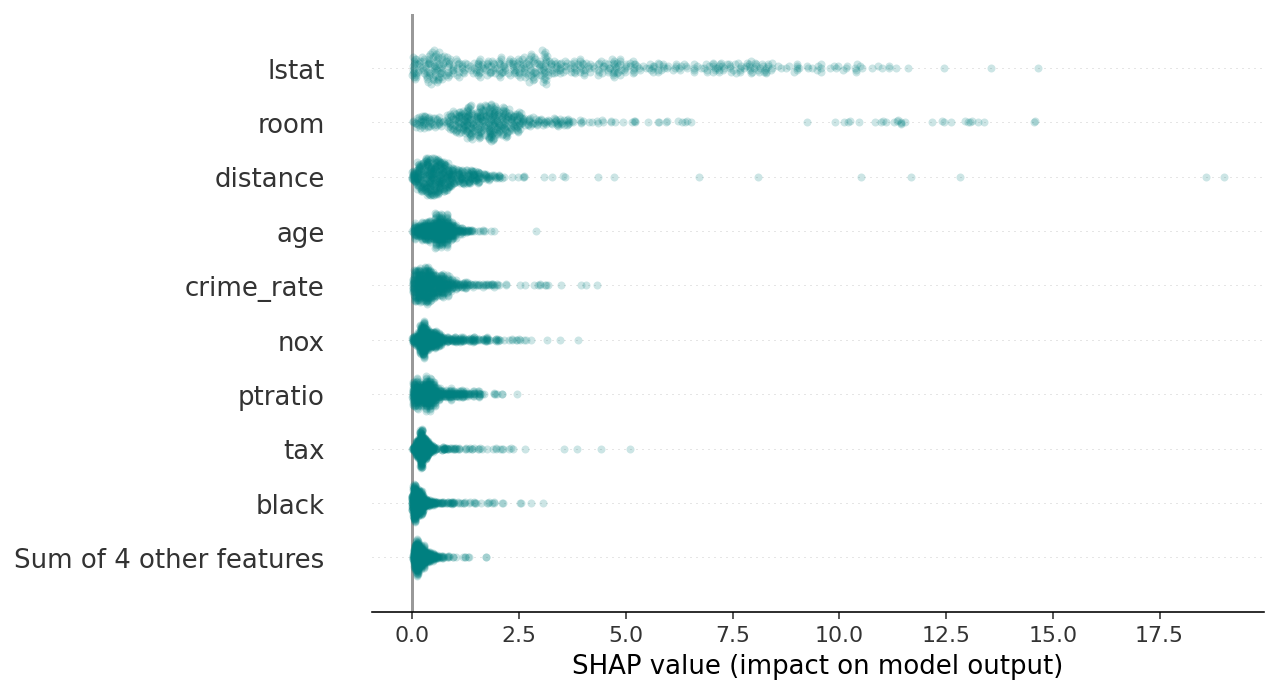

In [29]:
shap.plots.beeswarm(shapValue.abs, color='teal', alpha=0.2)

#### Dependence plot

ValueError: setting an array element with a sequence.

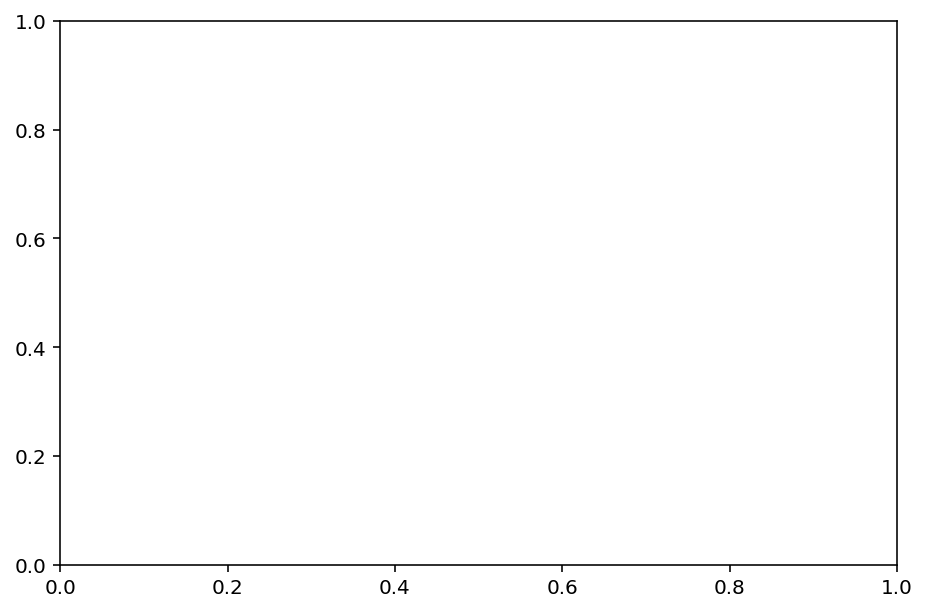

In [303]:
shap.dependence_plot(
    ('age', 'lstat'),
    explainer(xBoston, interactions=True),
    xBoston
)

## 2. Deep explainers

### 2.1. Text explainers

### 2.2. Image explainers